In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from nodepy import rk
from IPython.display import clear_output
import sys
import sympy as sym

ssp22 = rk.loadRKM('SSP22').__num__()
ssp22.bhat = np.array([1/3, 2/3])
#ssp22.bhat = np.array([1, 0])

ssp33 = rk.loadRKM('SSP33').__num__()
#ssp22.bhat = np.array([1/3, 2/3])
#print(ssp33.b)
print(ssp33.c)
ssp33.bhat= np.array([1., 0, 0])


A31= np.array([[0,0,0], [2/3,0,0], [1/3,1/3,0]])
b31= np.array([1/4, 0, 3/4])
rk31=  rk.ExplicitRungeKuttaMethod(A31,b31)
rk31.bhat= np.array([1/4, 3/8, 3/8])


# Third order Heun(3,3) method with a second order embedding
heun33 = rk.loadRKM('Heun33').__num__()
heun33.bhat = np.array([0.006419303047187, 0.487161393905626, 0.506419303047187]) # Main



print('heun33.c: ', heun33.c)


# Fourth order classical RK(4,4) method with a second order embedding. 3rd order embedding is not possible
rk44 = rk.loadRKM('RK44').__num__()
rk44.bhat = np.array([0.25,0.25,0.25,0.25]) # Main
rk44.b3= np.array([1,0,0,0])





fehlberg45 = rk.loadRKM("Fehlberg45").__num__() # Fifth order 

fehlberg45.b3 = np.array([0.122702088570621, 0.000000000000003, 0.251243531398616, -0.072328563385151, 0.246714063515406, 0.451668879900505])
print('fehlberg45.bhat',fehlberg45.bhat)





dp75 = rk.loadRKM('DP5').__num__()
print('dp75.bhat',dp75.bhat)
dp75.b3 = np.array([0.159422044716717, 0.000000000000009, 0.310936711045800, 0.444052776789396, 0.307005319740028, -0.230738637667449, 0.009321785375499]) #Main
print('dp75.c :',dp75.c)


print(ssp22.c)
print(ssp22.b)
rk44.c

[0.  1.  0.5]
heun33.c:  [0.         0.33333333 0.66666667]
fehlberg45.bhat [ 0.11574074  0.          0.54892788  0.53533138 -0.2         0.        ]
dp75.bhat [ 0.08991319  0.          0.45348907  0.6140625  -0.27151238  0.08904762
  0.025     ]
dp75.c : [0.         0.2        0.3        0.8        0.88888889 1.
 1.        ]
[0. 1.]
[0.5 0.5]


array([0. , 0.5, 0.5, 1. ])

In [23]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00', '#CC79A7', '#F0E442']
#linestyles = ['-', '--', '-.', ':', "-", "--", "-."]
linestyles = ['-', '--', '-.', (5, (10, 3)),(0, (3, 1, 1, 1))]
markers = ['o','D','X','s','v',"P"]

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}

import matplotlib
matplotlib.rc('font', **font)

#plt.rc("text", usetex=True)
plt.rc("legend", fontsize="medium", fancybox=True, framealpha=0.5)

plt.rcParams["mathtext.fontset"] = "cm"

In [24]:



def f(q):
    q1= q[0]
    q2= q[1]
    p1= q[2]
    p2= q[3]

    f_p1= - q1/ ((q1**2 + q2**2)**1.5)
    f_p2= - q2/ ((q1**2 + q2**2)**1.5)
    

    return np.array([p1, p2, f_p1, f_p2])





p1= sym.Symbol('p1')
p2= sym.Symbol('p2')
q1= sym.Symbol('q1')
q2= sym.Symbol('q2')

H= 0.5* (p1**2 + p2**2) - 1/(sym.sqrt(q1**2 + q2**2))
dHdp1 = sym.diff(H, p1); dHdp2 = sym.diff(H, p2); dHdq1 = sym.diff(H, q1); dHdq2 = sym.diff(H, q2); 
dH= sym.Matrix([dHdp1, dHdp2, dHdq1, dHdq2])

L= q1* p2 - q2*p1
dLdp1 = sym.diff(L, p1); dLdp2 = sym.diff(L, p2); dLdq1 = sym.diff(L, q1); dLdq2 = sym.diff(L, q2); 
dL= sym.Matrix([dLdp1, dLdp2, dLdq1, dLdq2])

V1= sym.Matrix([p1, p2, 0])
V2= sym.Matrix([0, 0, q1*p2 - q2*p1])
V1V2= V1.cross(V2)

V3= - 1/(sym.sqrt(q1**2 + q2**2)) *sym.Matrix([[q1], [q2], [0]])

V= V1V2 + V3

A= sym.sqrt(V.dot(V))
dAdp1 = sym.diff(A, p1); dAdp2 = sym.diff(A, p2); dAdq1 = sym.diff(A, q1); dAdq2 = sym.diff(A, q2); 
dA= sym.Matrix([dAdp1, dAdp2, dAdq1, dAdq2])





def G_1(q):
    q1= q[0]; q2= q[1]; p1= q[2]; p2= q[3]
    G1= 0.5* (p1**2 + p2**2) - 1/(np.sqrt(q1**2 + q2**2))
    #G1= H.subs({q1:q[0], q2:q[1], p1:q[2], p2:q[3]})
 
    return G1
    

def dG_1(q):
    q1= q[0]; q2= q[1]; p1= q[2]; p2= q[3]

    dG1 = np.array([q1/(q1**2 + q2**2)**(3/2), q2/(q1**2 + q2**2)**(3/2), p1, p2 ])
    
    #dG_vec = dH.subs({q1:q[0], q2:q[1], p1:q[2], p2:q[3]})
    #dG1= np.array([dG_vec[0,0], dG_vec[1,0], dG_vec[2,0], dG_vec[3,0]])
    
    return dG1



def G_2(q):
    q1= q[0]; q2= q[1]; p1= q[2]; p2= q[3]
    G2= q1* p2 - q2*p1
    #G2= L.subs({q1:q[0], q2:q[1], p1:q[2], p2:q[3]})

    return G2

def dG_2(q):
    
    q1= q[0]; q2= q[1]; p1= q[2]; p2= q[3]

    dG2 = np.array([p2, -p1, -q2, q1 ])
    
    #dG_vec = dL.subs({q1:q[0], q2:q[1], p1:q[2], p2:q[3]})
    #dG2= np.array([dG_vec[0,0], dG_vec[1,0], dG_vec[2,0], dG_vec[3,0]])
    
    return dG2
    

def G_3(q): # Used the code from MRRK
    q1= q[0]; q2= q[1]; p1= q[2]; p2= q[3]
    
    abs_q = np.sqrt(q1*q1 + q2*q2)
    A1 = p2*(q1*p2 - q2*p1) - q1/abs_q; A2 = -p1*(q1*p2 - q2*p1) - q2/abs_q #
    G3=  np.linalg.norm(np.array([A1,A2]))**1

    return G3

def dG_3(q):
    q1= q[0]; q2= q[1]; p1= q[2]; p2= q[3]

    dAdq1= ((-2*p1*p2 + 2*q1*q2/(q1**2 + q2**2)**(3/2))*(-p1*(-p1*q2 + p2*q1) - q2/np.sqrt(q1**2 + q2**2))/2 + (p2*(-p1*q2 + p2*q1) - q1/np.sqrt(q1**2 + q2**2))*(2*p2**2 + 2*q1**2/(q1**2 + q2**2)**(3/2) - 2/np.sqrt(q1**2 + q2**2))/2)/np.sqrt((-p1*(-p1*q2 + p2*q1) - q2/np.sqrt(q1**2 + q2**2))**2 + (p2*(-p1*q2 + p2*q1) - q1/np.sqrt(q1**2 + q2**2))**2)
    dAdq2=  ((-2*p1*p2 + 2*q1*q2/(q1**2 + q2**2)**(3/2))*(p2*(-p1*q2 + p2*q1) - q1/np.sqrt(q1**2 + q2**2))/2 + (-p1*(-p1*q2 + p2*q1) - q2/np.sqrt(q1**2 + q2**2))*(2*p1**2 + 2*q2**2/(q1**2 + q2**2)**(3/2) - 2/np.sqrt(q1**2 + q2**2))/2)/np.sqrt((-p1*(-p1*q2 + p2*q1) - q2/np.sqrt(q1**2 + q2**2))**2 + (p2*(-p1*q2 + p2*q1) - q1/np.sqrt(q1**2 + q2**2))**2)
    dAdp1=  (-p2*q2*(p2*(-p1*q2 + p2*q1) - q1/np.sqrt(q1**2 + q2**2)) + (4*p1*q2 - 2*p2*q1)*(-p1*(-p1*q2 + p2*q1) - q2/np.sqrt(q1**2 + q2**2))/2)/np.sqrt((-p1*(-p1*q2 + p2*q1) - q2/np.sqrt(q1**2 + q2**2))**2 + (p2*(-p1*q2 + p2*q1) - q1/np.sqrt(q1**2 + q2**2))**2)
    dAdp2= (-p1*q1*(-p1*(-p1*q2 + p2*q1) - q2/np.sqrt(q1**2 + q2**2)) + (-2*p1*q2 + 4*p2*q1)*(p2*(-p1*q2 + p2*q1) - q1/np.sqrt(q1**2 + q2**2))/2)/np.sqrt((-p1*(-p1*q2 + p2*q1) - q2/np.sqrt(q1**2 + q2**2))**2 + (p2*(-p1*q2 + p2*q1) - q1/np.sqrt(q1**2 + q2**2))**2)
    
    dG3= np.array([dAdq1, dAdq2, dAdp1, dAdp2])
    
    return dG3
    


def rgam(gammas,q,inc1,inc2, inc3,E1_old,E2_old, E3_old):
    gamma1, gamma2, gamma3 = gammas
    qprop = q + gamma1*inc1 + gamma2*inc2 + gamma3*inc3 
    E1 = G_1(qprop)
    E2 = G_2(qprop)
    E3= G_3(qprop)
    #print('rgam output: ',np.array([E1-E1_old,E2-E2_old, E3-E3_old]))
    return np.array([E1-E1_old,E2-E2_old, E3-E3_old], dtype='float64')

def rgam_RF(epss,dt, q_tilde, search1,search2,search3, E1_old,E2_old, E3_old):
    eps1, eps2 , eps3 = epss
    
    qprop = q_tilde + dt* eps1* search1  + dt* eps2* search2 +  dt* eps3* search3
    E1 = G_1(qprop)
    E2 = G_2(qprop)
    E3 = G_3(qprop)
    return np.array([E1-E1_old,E2-E2_old, E3- E3_old])





In [25]:
# Exact solution, from paper MRRK
def q_kepler(t):
    e = 0.5
    u0 = np.array([1.0 - e, 0.0, 0.0, np.sqrt((1+e)/(1-e))])
    energy = 0.5 * (u0[2]*u0[2] + u0[3]*u0[3]) - 1.0 / np.sqrt(u0[0]*u0[0] + u0[1]*u0[1])
    momentum = u0[0]*u0[3] - u0[1]*u0[2]
    
    res = fsolve(lambda alpha: alpha - e*np.sin(alpha) - t, 0, xtol=1.e-12)
    alpha = res[0]
    #print('alpha: ', alpha)
    
    theta = 2.0 * np.arctan(np.sqrt((1+e)/(1-e)) * np.tan(0.5*alpha))
    radius = (1 - e*e) / (1 + e * np.cos(theta))
    q0 = radius * np.cos(theta)
    q1 = radius * np.sin(theta)
    
    # using the conservation of angular momentum and energy
    abs2p = 2 * (energy + 1.0 / np.sqrt(q0*q0 + q1*q1))
    if q1 <= 0:
        p0 = -((momentum*q1 + np.sqrt(q0**2 * (-momentum**2 + abs2p*(q0**2 + q1**2)))) / (q0**2 + q1**2))
        p1 = (momentum*q0**2 - q1*np.sqrt(q0**2 * (-momentum**2 + abs2p*q0**2 + abs2p*q1**2))) / (q0**3 + q0*q1**2)
    else:
        p0 = (-(momentum*q1) + np.sqrt(q0**2 * (-momentum**2 + abs2p*(q0**2 + q1**2)))) / (q0**2 + q1**2)
        p1 = (momentum*q0**2 + q1 * np.sqrt(q0**2 * (-momentum**2 + abs2p*q0**2 + abs2p*q1**2))) / (q0**3 + q0*q1**2)
    return np.array([q0, q1, p0, p1])

In [26]:
def project_direction(v1, v2, v3, F):
    s= np.size(F[:, 0])
    n= np.size(F[0, :])

    Normals= np.zeros((1, n))

    v1= v1/ np.linalg.norm(v1)
    v2= v2/ np.linalg.norm(v2)
    v3= v3/ np.linalg.norm(v3)




    for i in range(s):
        normal = np.copy(F[i , :])
        normal= normal/ np.linalg.norm(normal)
        for j in range(np.size( Normals[:, 0] )):

            normal -= np.dot(normal, Normals[j, :])* Normals[j, :]

        
        
        if np.linalg.norm(normal) > 1.e-12:
            normal= normal / np.linalg.norm(normal)

            Normals= np.append(Normals, np.reshape(normal.copy(), (1,len(normal))), axis=0)
            
    #Normals= np.array([[1,0,0], [0,1,0], [0,0,1]])
    #print('Normals: ', Normals)
    
    #print('dG1.Normal1: ', np.dot(v1, Normals[1, :]))
    #print('dG1.Normal2: ', np.dot(v1, Normals[2, :]))
 
    
    v1_projected= np.zeros(n)
    v2_projected= np.zeros(n)
    v3_projected= np.zeros(n)
    
    for i in range(np.size( Normals[:, 0] )):
        #print('dot(u, Normals): ',np.dot(u, Normals[i, :]))
        v1_projected += np.dot(v1, Normals[i, :])* Normals[i, :]
        v2_projected += np.dot(v2, Normals[i, :])* Normals[i, :]
        v3_projected += np.dot(v3, Normals[i, :])* Normals[i, :]

    #print('optimized deg:', (180/np.pi)* np.arccos(np.dot(u, u_projected)/ (np.linalg.norm(u)* np.linalg.norm(u_projected))))

    return v1_projected, v2_projected, v3_projected

# Baseline RK

In [27]:
# Compute solution with baseline RK methods
def compute_sol_without_relaxation(Mthdname,rkm, dt, f, T, u0,t0): 
    tt = np.zeros(1) 
    t = t0; tt[0] = t
    uu = np.zeros((1,np.size(u0))) 
    uu[0,:] = u0.copy()
    
    s = len(rkm)
    y = np.zeros((s,len(u0))) 
    F = np.zeros((s,len(u0))) 
    Inv1= np.array(G_1(u0)); Inv2= np.array(G_2(u0)); Inv3= np.array(G_3(u0));
    
    steps = 0
    
    while t < T and not np.isclose(t, T,  rtol=1e-12, atol=1e-12):
        #clear_output(wait=True)
        if t + dt > T:
            dt = T - t
        for i in range(s):
            y[i,:] = uu[-1].copy()
            for j in range(i):
                y[i,:] += dt*rkm.A[i,j]*F[j,:]
            F[i,:] = f(y[i,:])
        inc = dt*sum([rkm.b[i]*F[i] for i in range(s)])    
        unew = uu[-1]+inc; t+= dt

        E1_new= G_1(unew)
        E2_new= G_2(unew)
        E3_new= G_3(unew)
        
        Inv1= np.append(Inv1, E1_new) ; Inv2= np.append(Inv2, E2_new); Inv3= np.append(Inv3, E3_new)
        
        
        tt = np.append(tt, t)
        steps +=1
        uu = np.append(uu, np.reshape(unew.copy(), (1,len(unew))), axis=0)  
        #print("Method = Baseline %s: (time = %1.2f)"%(Mthdname,tt[-1]))
    return tt, uu, Inv1, Inv2, Inv3

# MRRK 

In [28]:
# Computing solution with multiple relaxation methods
def compute_sol_multi_relaxation(Mthdname,rkm, dt, f, T, u0, t0):
    tt = np.zeros(1) 
    t = t0; tt[0] = t
    uu = np.zeros((1,np.size(u0))) 
    uu[0,:] = u0.copy()
    
    s = len(rkm)
    y = np.zeros((s,len(u0))) 
    F = np.zeros((s,len(u0))) 
    
    G1 = np.array([]); G2 = np.array([]); G3 = np.array([]); 
    no_inv = 3; gammas0 = np.zeros(no_inv)
    Inv1= np.array(G_1(u0)); Inv2= np.array(G_2(u0)); Inv3= np.array(G_3(u0));
    
    errs = 0; steps = 0
    
    while t < T and not np.isclose(t, T):
        #clear_output(wait=True)
        if t + dt > T:
            dt = T - t
        for i in range(s):
            y[i,:] = uu[-1].copy()
            for j in range(i):
                y[i,:] += dt*rkm.A[i,j]*F[j,:]
            F[i,:] = f(y[i,:])
            
        inc1 = dt*sum([rkm.b[i]*F[i] for i in range(s)])
        inc2 = dt*sum([rkm.bhat[i]*F[i] for i in range(s)])
        inc3 = dt*sum([rkm.b3[i]*F[i] for i in range(s)])
        
        #wr_unew = uu[-1] + inc1; E1_old = G_1(uu[-1]); E2_old = G_2(uu[-1])
        wr_unew = uu[-1] + inc1; E1_old = G_1(uu[0]); E2_old = G_2(uu[0]); E3_old = G_3(uu[0])
        
        gammas, info, ier, mesg = fsolve(rgam,gammas0,args=(wr_unew,inc1,inc2, inc3 ,E1_old,E2_old, E3_old),full_output=True)
        gamma1, gamma2, gamma3 = gammas
        #print('gammas: ', gammas)
        
        unew =  wr_unew + gamma1*inc1 + gamma2*inc2 + gamma3*inc3 ;
        
        t+=(1+gamma1+gamma2 + gamma3)*dt
        #t+=dt
        
        E1_new= G_1(unew)
        E2_new= G_2(unew)
        E3_new= G_3(unew)
      
        
        tt = np.append(tt, t)
        steps += 1
        uu = np.append(uu, np.reshape(unew.copy(), (1,len(unew))), axis=0) 
        G1 = np.append(G1, gamma1); G2 = np.append(G2, gamma2); G3 = np.append(G3, gamma3)

        Inv1= np.append(Inv1, E1_new) ; Inv2= np.append(Inv2, E2_new); Inv3= np.append(Inv3, E3_new)

        if np.abs(G_1(unew)- G_1(u0))> 1.e-13 or np.abs(G_2(unew)- G_2(u0))> 1.e-13 or  np.abs(G_3(unew)- G_3(u0))> 1.e-13 :
            
            print('Error_ Relaxation Method: Invariant(s) are not preserved  ')
            print('t: ', t)
            print('G_1(u) - G_1(u0): ', G_1(unew) - G_1(u0))
            print('G_2(u) - G_2(u0): ', G_2(unew) - G_2(u0))
            print('G_3(u) - G_3(u0): ', G_3(unew) - G_3(u0))
            #sys.exit(1)
            #quit()
            t= T # to stop the integration

        #if steps % 100 == 0:
            #print("Method = Relaxation %s: At step number = %d (time = %1.2f), integer flag = %d and E1-E1_old = %f, E2-E2_old = %f \n"%(Mthdname,steps,tt[-1],ier,E1_new-E1_old,E2_new-E2_old))
        #print("Method = Relaxation %s:  (time = %1.2f), integer flag = %d  \n"%(Mthdname,tt[-1],ier))
        
    ave_dt= dt* (1+ np.average(G1) + np.average(G2) + np.average(G3))

    return tt, uu,  Inv1, Inv2, Inv3

# Multiple QO

In [29]:
def compute_sol_multi_QO(Mthdname,rkm, dt, f, T, u0, t0):
    tt = np.zeros(1) 
    t = t0; tt[0] = t
    uu = np.zeros((1,np.size(u0))) 
    uu[0,:] = u0.copy()
    u = np.array(u0)
    
    s = len(rkm)
    y = np.zeros((s,len(u0))) 
    F = np.zeros((s,len(u0))) 
    b= rkm.b

    #old_eps= 0.001 # To be determined
    
    Eps1 = np.array([]); Eps2 = np.array([]); Eps3 = np.array([])
    Inv1= np.array(G_1(u0)); Inv2= np.array(G_2(u0)); Inv3= np.array(G_3(u0)); 
    
    no_inv = 3; epss0 = np.zeros(no_inv)
    
    errs = 0; steps = 0
    n=0
    
    while t < T and not np.isclose(t, T):
    #while t < T and not n > 1 and not np.isclose(t, T):

        n+=1 
        #clear_output(wait=True)
        if t + dt > T:
            dt = T - t
        for i in range(s):
            y[i,:] = u.copy()
            for j in range(i):
                y[i,:] += dt*rkm.A[i,j]*F[j,:]
            F[i,:] = f(y[i,:])

  

 

        
        u_tilde= u + dt*sum([b[i]*F[i] for i in range(s)])
        #print(u_tilde/np.linalg.norm(u_tilde))

        dG1= dG_1(u_tilde) / np.linalg.norm(dG_1(u_tilde))
        dG2= dG_2(u_tilde) / np.linalg.norm(dG_2(u_tilde))
        dG3= dG_3(u_tilde) / np.linalg.norm(dG_3(u_tilde))

        #print('dG1= ', dG1)
        #print('dG2= ', dG2)
        


        search1, search2, search3 = project_direction (dG_1(u_tilde), dG_2(u_tilde), dG_3(u_tilde), F) # projects dG_1(wr_unew) to the space created by stage derivative vectors
        if np.linalg.norm(search1) < 1.e-7 or np.linalg.norm(search2) < 1.e-7:
            print('Search close to zero')
            sys.exit(1)
            


        search1= search1 /np.linalg.norm(search1)
        search2= search2 /np.linalg.norm(search2)
        search3= search3 /np.linalg.norm(search3)

        
        
        E1_old = G_1(u0); E2_old = G_2(u0); E3_old = G_3(u0); 
     
        epss, info, ier, mesg = fsolve(rgam_RF,epss0,args=(dt, u_tilde,search1, search2, search3,E1_old,E2_old, E3_old),full_output=True)
       
        eps1, eps2, eps3 = epss
        
        
            
        
        u = u_tilde + dt*eps1*search1 + dt*eps2*search2 + dt*eps3*search3; 
        #u= u_tilde
        t+=dt

        if np.abs(G_1(u)- G_1(u0))> 1.e-13 or np.abs(G_2(u)- G_2(u0))> 1.e-13 or  np.abs(G_3(u)- G_3(u0))> 1.e-13 :
            print('Error QO Method: Invariant(s) are not preserved  ')
            print('G_1(u) - G_1(u0): ', G_1(u) - G_1(u0))
            print('G_2(u) - G_2(u0): ', G_2(u) - G_2(u0))
            print('G_3(u) - G_3(u0): ', G_3(u) - G_3(u0))
            print('epss: ', epss)
            print('search1 :', search1)
            print('search2 :', search2)
            print('search3 :', search3)
            print('dG1 : ', dG_1(u_tilde))
            print('dG2 : ', dG_2(u_tilde))
            print('dG3 : ', dG_3(u_tilde))
            print('u_tilde: ', u_tilde)
            print('F: ', F)
            sys.exit(1)

        


        E1_new= G_1(u)
        E2_new= G_2(u)
        E3_new= G_3(u)
        tt = np.append(tt, t)
        steps += 1
        uu = np.append(uu, np.reshape(u.copy(), (1,len(u))), axis=0) 
        Eps1 = np.append(Eps1, eps1); Eps2 = np.append(Eps2, eps2); Eps3 = np.append(Eps3, eps3)
        Inv1= np.append(Inv1, E1_new) ; Inv2= np.append(Inv2, E2_new); Inv3= np.append(Inv3, E3_new)
        #print("Method = QO %s: dt = %1.5f (time = %1.2f), integer flag = %d and E1-E1_old = %f, E2-E2_old = %f \n"%(Mthdname,dt,tt[-1],ier,E1_new-E1_old,E2_new-E2_old))
        #print("Method = QO %s:(time = %1.2f), integer flag = %d \n"%(Mthdname,tt[-1],ier))
    return tt, uu, Inv1, Inv2, Inv3

# Invariant Change & Error growth - RK44

Error_ Relaxation Method: Invariant(s) are not preserved  
t:  5.4490722156180915
G_1(u) - G_1(u0):  8.047135180433429e-10
G_2(u) - G_2(u0):  -1.181187370136172e-10
G_3(u) - G_3(u0):  1.4116579016842934e-09


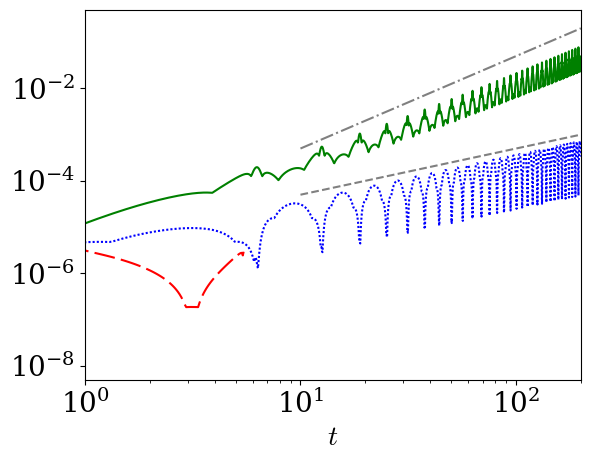

<Figure size 640x480 with 0 Axes>

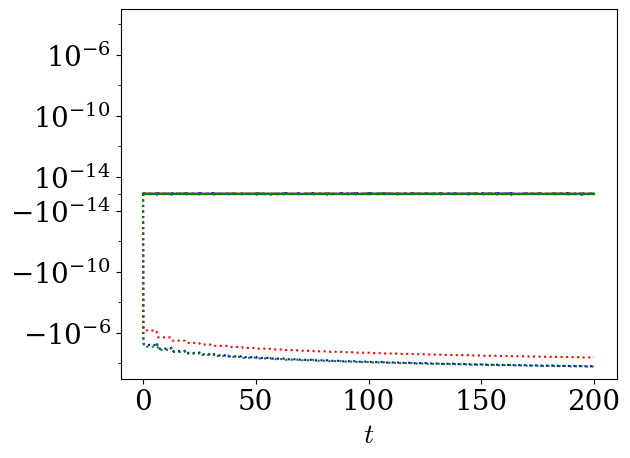

<Figure size 640x480 with 0 Axes>

In [30]:
methods = [ rk44]
method_labels = ['RK(4,4)']
method_names = ['RK(4,4)']

# Inputs to solve the system of ODEs 
DT = [ 0.05]; 
tf = 200; 



e= 0.5
t0 = 0; q0 = np.array([1 - e, 0, 0, np.sqrt((1 + e)/(1 - e))])

i=2
rkm= methods[0]
dt= DT[0]


qo_T, qo_U, qo_Inv1, qo_Inv2, qo_Inv3= compute_sol_multi_QO('QO_RK', rkm, dt, f, tf, q0, t0)

r_T, r_U,  r_Inv1, r_Inv2, r_Inv3= compute_sol_multi_relaxation('RRK', rkm, dt, f, tf, q0, t0)
rk_T, rk_U, rk_Inv1, rk_Inv2, rk_Inv3= compute_sol_without_relaxation('RK',rkm, dt, f, tf, q0,t0)




Error_qo = [np.max(np.abs(qo_U[j,0:2] - q_kepler(qo_T[j])[0:2])) for j in np.arange(len(qo_T))]
Error_r = [np.max(np.abs(r_U[j,0:2] - q_kepler(r_T[j])[0:2])) for j in np.arange(len(r_T))]
Error_rk = [np.max(np.abs(rk_U[j,0:2] - q_kepler(rk_T[j])[0:2])) for j in np.arange(len(rk_T))]



plt.figure()

plt.plot(rk_T, Error_rk, 'g',linestyle= '-', label= 'Base RK')
plt.plot(qo_T, Error_qo, 'b',linestyle= (0,(1,1)), label= 'Quasi-Orthogonal')
plt.plot(r_T, Error_r, 'r',linestyle= (5, (10,3)), label= 'Relaxation')





lgd_box_pos = [[0.4,0.2,0.5, 0.5],[0.4,0.1,0.5, 0.5],[0.4,0.5,0.5, 0.5]]
sl1_cons_mult = [8e-6,1e-6,5e-6]; sl1_p = [1,1,1]
sl2_cons_mult = [2*1e-4,6e-8,4*1e-7]; sl2_p = [2,2,2]
y_scale_line = [1e-10,1e-8,1e-7]
shift = 1
sl_t = np.linspace(10,200,1000)
plt.plot(sl_t,0.5e-5*sl_t**1,'--',color='0.5',label="$\mathcal{O}(t^{%d})$"%(sl1_p[1]))
plt.plot(sl_t,0.5e-5*sl_t**2,linestyle='dashdot',color='0.5',label="$\mathcal{O}(t^{%d})$"%(sl2_p[1]))


plt.xlabel("$ t$")

plt.xscale("log"); plt.yscale("log")
plt.xlim(1, 200)
plt.yticks([1e-8, 1.e-6, 1e-4,  1e-2])
plt.ylim(5e-9, 5e-1)


plt.savefig("Figures/Kepler_RK44_Error_evol.png",bbox_inches="tight")
ax = plt.gca()
plt.figure()
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc="center", ncol=5)
#plt.savefig("./Figures/Kepler_Error_evol_legend.png",bbox_inches="tight")


plt.show() 


#------------------------------------------------------------------------------------
plt.figure()


plt.plot(qo_T, qo_Inv1 - qo_Inv1[0],  'b', label= 'Quasi-Orthogonal: $G_1(q(t))- G_1(q(0))$')
plt.plot(rk_T, rk_Inv1 - rk_Inv1[0], 'b:',  label= 'Base RK: $G_1(q(t))- G_1(q(0))$')

plt.plot(qo_T, qo_Inv2 - qo_Inv2[0],  'r', label= 'Quasi-Orthogonal: $G_2(q(t))- G_2(q(0))$')
plt.plot(rk_T, rk_Inv2 - rk_Inv2[0], 'r:', label= 'Base RK: $G_2(q(t))- G_2( q(0))$')

plt.plot(qo_T, qo_Inv3 - qo_Inv3[0],  'g', label= 'Quasi-Orthogonal: $G_3(q(t))- G_3(q(0))$')
plt.plot(rk_T, rk_Inv3 - rk_Inv3[0], 'g:', label= 'Base RK: $G_3(q(t))- G_3(q(0))$')


plt.yscale("symlog", linthresh=1.e-14)
plt.xticks([0, 50, 100,150,  200])
plt.yticks([-1.e-6, -1.e-10, -1.e-14, 1.e-14, 1.e-10, 1.e-6])

plt.xlabel("$ t$")
plt.ylim(-1e-3, 1e-3)

#plt.savefig("Figures/Kepler_RK44_Inv_Change.png",bbox_inches="tight")

ax = plt.gca()
plt.figure()
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc="center", ncol=3)
#plt.savefig("./Figures/Kepler_Inv_legend.png",bbox_inches="tight")


plt.show()  


# Invariant Change & Error growth -Fehlberg(6,5)

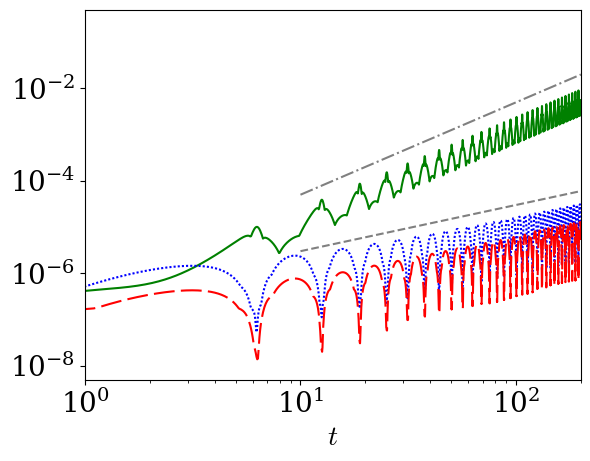

<Figure size 640x480 with 0 Axes>

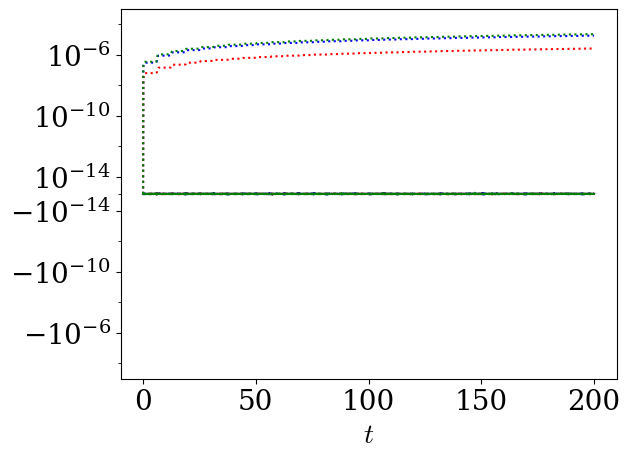

<Figure size 640x480 with 0 Axes>

In [31]:
methods = [ fehlberg45]
method_labels = ['Feglberg(6,5)']
method_names = ['Feglberg(6,5)']

# Inputs to solve the system of ODEs 
DT = [ 0.05]; 
tf = 200; 



e= 0.5
t0 = 0; q0 = np.array([1 - e, 0, 0, np.sqrt((1 + e)/(1 - e))])

i=2
rkm= methods[0]
dt= DT[0]


qo_T, qo_U, qo_Inv1, qo_Inv2, qo_Inv3= compute_sol_multi_QO('QO_RK', rkm, dt, f, tf, q0, t0)

r_T, r_U,  r_Inv1, r_Inv2, r_Inv3= compute_sol_multi_relaxation('RRK', rkm, dt, f, tf, q0, t0)
rk_T, rk_U, rk_Inv1, rk_Inv2, rk_Inv3= compute_sol_without_relaxation('RK',rkm, dt, f, tf, q0,t0)




Error_qo = [np.max(np.abs(qo_U[j,0:2] - q_kepler(qo_T[j])[0:2])) for j in np.arange(len(qo_T))]
Error_r = [np.max(np.abs(r_U[j,0:2] - q_kepler(r_T[j])[0:2])) for j in np.arange(len(r_T))]
Error_rk = [np.max(np.abs(rk_U[j,0:2] - q_kepler(rk_T[j])[0:2])) for j in np.arange(len(rk_T))]



plt.figure()

plt.plot(rk_T, Error_rk, 'g',linestyle= '-', label= 'Base RK')
plt.plot(qo_T, Error_qo, 'b',linestyle= (0,(1,1)), label= 'Quasi-Orthogonal')
plt.plot(r_T, Error_r, 'r',linestyle= (5, (10,3)), label= 'Relaxation')





lgd_box_pos = [[0.4,0.2,0.5, 0.5],[0.4,0.1,0.5, 0.5],[0.4,0.5,0.5, 0.5]]
sl1_cons_mult = [8e-6,1e-6,5e-6]; sl1_p = [1,1,1]
sl2_cons_mult = [2*1e-4,6e-8,4*1e-7]; sl2_p = [2,2,2]
y_scale_line = [1e-10,1e-8,1e-7]
shift = 1
sl_t = np.linspace(10,200,1000)
plt.plot(sl_t,0.3e-6*sl_t**1,'--',color='0.5',label="$\mathcal{O}(t^{%d})$"%(sl1_p[1]))
plt.plot(sl_t,0.5e-6*sl_t**2,linestyle='dashdot',color='0.5',label="$\mathcal{O}(t^{%d})$"%(sl2_p[1]))


plt.xlabel("$ t$")

plt.xscale("log"); plt.yscale("log")
plt.xlim(1, 200)
plt.ylim(5e-9, 5e-1)

plt.yticks([1e-8, 1.e-6, 1e-4,  1e-2])



#plt.savefig("Figures/Kepler_Fehlberg_Error_evol.png",bbox_inches="tight")
ax = plt.gca()
plt.figure()
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc="center", ncol=5)



plt.show() 


#------------------------------------------------------------------------------------
plt.figure()

plt.plot(qo_T, qo_Inv1 - qo_Inv1[0],  'b', label= 'Quasi-Orthogonal: $G_1(p(t), q(t))- G_1(p(0), q(0))$')
plt.plot(rk_T, rk_Inv1 - rk_Inv1[0], 'b:',  label= 'Base RK: $G_1(p(t), q(t))- G_1(p(0), q(0))$')

plt.plot(qo_T, qo_Inv2 - qo_Inv2[0],  'r', label= 'Quasi-Orthogonal: $G_2(p(t), q(t))- G_2(p(0), q(0))$')
plt.plot(rk_T, rk_Inv2 - rk_Inv2[0], 'r:', label= 'Base RK: $G_2(p(t), q(t))- G_2(p(0), q(0))$')

plt.plot(qo_T, qo_Inv3 - qo_Inv3[0],  'g', label= 'Quasi-Orthogonal: $G_3(p(t), q(t))- G_3(p(0), q(0))$')
plt.plot(rk_T, rk_Inv3 - rk_Inv3[0], 'g:', label= 'Base RK: $G_3(p(t), q(t))- G_3(p(0), q(0))$')


plt.yscale("symlog", linthresh=1.e-14)
plt.xticks([0, 50, 100,150,  200])
plt.yticks([-1.e-6, -1.e-10, -1.e-14, 1.e-14, 1.e-10, 1.e-6])

plt.xlabel("$ t$")
plt.ylim(-1e-3, 1e-3)

#plt.savefig("Figures/Kepler_Fehlberg_Inv_Change.png",bbox_inches="tight")

ax = plt.gca()
plt.figure()
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc="center", ncol=3)
#plt.savefig("./Figures/Kepler_Inv_legend.png",bbox_inches="tight")


plt.show()  

# Invariant Change, Error growth - DP(7,5)

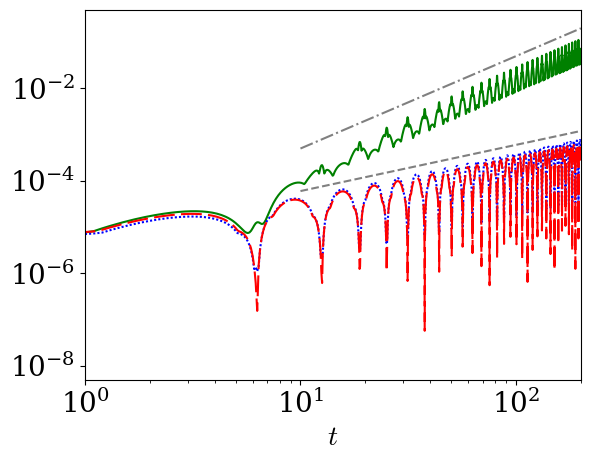

<Figure size 640x480 with 0 Axes>

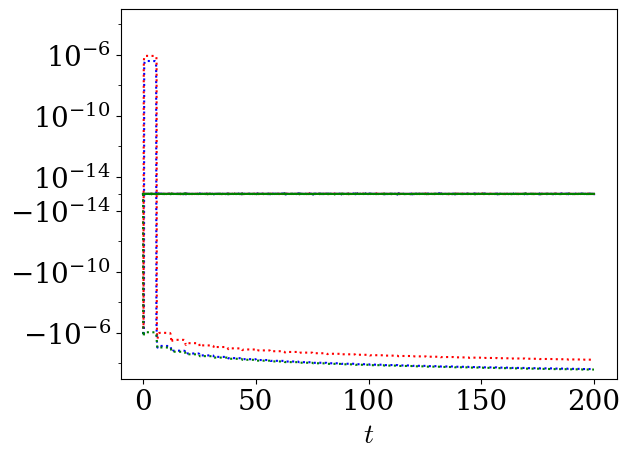

<Figure size 640x480 with 0 Axes>

In [32]:
methods = [ dp75]
method_labels = ['DP(7,5)']
method_names = ['DP(7,5)']

# Inputs to solve the system of ODEs 
DT = [ 0.1]; 
tf = 200; 



e= 0.5
t0 = 0; q0 = np.array([1 - e, 0, 0, np.sqrt((1 + e)/(1 - e))])

i=2
rkm= methods[0]
dt= DT[0]


qo_T, qo_U, qo_Inv1, qo_Inv2, qo_Inv3= compute_sol_multi_QO('QO_RK', rkm, dt, f, tf, q0, t0)

r_T, r_U,  r_Inv1, r_Inv2, r_Inv3= compute_sol_multi_relaxation('RRK', rkm, dt, f, tf, q0, t0)
rk_T, rk_U, rk_Inv1, rk_Inv2, rk_Inv3= compute_sol_without_relaxation('RK',rkm, dt, f, tf, q0,t0)




Error_qo = [np.max(np.abs(qo_U[j,0:2] - q_kepler(qo_T[j])[0:2])) for j in np.arange(len(qo_T))]
Error_r = [np.max(np.abs(r_U[j,0:2] - q_kepler(r_T[j])[0:2])) for j in np.arange(len(r_T))]
Error_rk = [np.max(np.abs(rk_U[j,0:2] - q_kepler(rk_T[j])[0:2])) for j in np.arange(len(rk_T))]



plt.figure()

plt.plot(rk_T, Error_rk, 'g',linestyle= '-', label= 'Base RK')
plt.plot(qo_T, Error_qo, 'b',linestyle= (0,(1,1)), label= 'Quasi-Orthogonal')
plt.plot(r_T, Error_r, 'r',linestyle= (5, (10,3)), label= 'Relaxation')




lgd_box_pos = [[0.4,0.2,0.5, 0.5],[0.4,0.1,0.5, 0.5],[0.4,0.5,0.5, 0.5]]
sl1_cons_mult = [8e-6,1e-6,5e-6]; sl1_p = [1,1,1]
sl2_cons_mult = [2*1e-4,6e-8,4*1e-7]; sl2_p = [2,2,2]
y_scale_line = [1e-10,1e-8,1e-7]
shift = 1
sl_t = np.linspace(10,200,1000)
plt.plot(sl_t,6e-6*sl_t**1,'--',color='0.5',label="$\mathcal{O}(t^{%d})$"%(sl1_p[1]))
plt.plot(sl_t,0.5e-5*sl_t**2,linestyle='dashdot',color='0.5',label="$\mathcal{O}(t^{%d})$"%(sl2_p[1]))


plt.xlabel("$ t$")

plt.xscale("log"); plt.yscale("log")
plt.xlim(1, 200)
plt.yticks([1e-8, 1.e-6, 1e-4,  1e-2])

plt.ylim(5e-9, 5e-1)


#plt.savefig("Figures/Kepler_DP75_Error_evol.png",bbox_inches="tight")
ax = plt.gca()
plt.figure()
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc="center", ncol=5)


plt.show() 


#------------------------------------------------------------------------------------
plt.figure()

plt.plot(qo_T, qo_Inv1 - qo_Inv1[0],  'b', label= 'Quasi-Orthogonal: $G_1(p(t), q(t))- G_1(p(0), q(0))$')
plt.plot(rk_T, rk_Inv1 - rk_Inv1[0], 'b:',  label= 'Base RK: $G_1(p(t), q(t))- G_1(p(0), q(0))$')

plt.plot(qo_T, qo_Inv2 - qo_Inv2[0],  'r', label= 'Quasi-Orthogonal: $G_2(p(t), q(t))- G_2(p(0), q(0))$')
plt.plot(rk_T, rk_Inv2 - rk_Inv2[0], 'r:', label= 'Base RK: $G_2(p(t), q(t))- G_2(p(0), q(0))$')

plt.plot(qo_T, qo_Inv3 - qo_Inv3[0],  'g', label= 'Quasi-Orthogonal: $G_3(p(t), q(t))- G_3(p(0), q(0))$')
plt.plot(rk_T, rk_Inv3 - rk_Inv3[0], 'g:', label= 'Base RK: $G_3(p(t), q(t))- G_3(p(0), q(0))$')


plt.yscale("symlog", linthresh=1.e-14)
plt.xticks([0, 50, 100,150,  200])
plt.yticks([-1.e-6, -1.e-10, -1.e-14, 1.e-14, 1.e-10, 1.e-6])

plt.ylim(-1e-3, 1e-3)

plt.xlabel("$ t$")

#plt.savefig("Figures/Kepler_DP75_Inv_Change.png",bbox_inches="tight")

ax = plt.gca()
plt.figure()
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc="center", ncol=3)


plt.show()  

# Convergence Base RK

In [33]:



methods = [rk44, fehlberg45, dp75]


method_names = ['RK(4,4)', "Fehlberg(6,5)", 'DP(7,5)']


T= 1*np.pi # 8 Cycles


dts= np.array([  0.001,0.002, 0.003, 0.005, 0.01, 0.05 ])


# Initial condition
e= 0.5
t0 = 0; q0 = np.array([1 - e, 0, 0, np.sqrt((1 + e)/(1 - e))])



b_errs = np.zeros((len(methods),len(dts)));



for idx in range(len(methods)):
    rkm = methods[idx]
    for dt_idx in range(len(dts)):
        dt = dts[dt_idx]
        b_T, b_U, b_Inv1, b_Inv2, b_Inv3 = compute_sol_without_relaxation(method_names[idx], rkm, dt, f, T, q0, t0)

       
        b_error = np.max(np.abs(b_U[-1, 0:2]-np.array([-1-e, 0]))); 
        
        
        b_errs[idx][dt_idx]=b_error; 
        

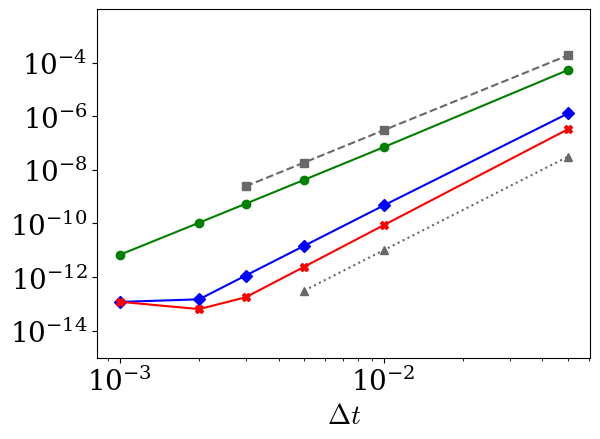

<Figure size 640x480 with 0 Axes>

In [34]:
from itertools import cycle
lines = [":","--","-.","-"]
colors = ["green", "blue", "red" ]



markers = ['o','D','X','s','^',"P"]


fig = plt.figure(2)
for idx in range(len(methods)):
    
    
    plt.plot(dts,b_errs[idx],color = colors[idx],linestyle='-',marker=markers[idx],label = method_names[idx])

plt.ylim(1.e-15, 1.e-2)


plt.plot(dts[2:], 30*dts[2:]**4, linestyle="--", marker=markers[3], color="dimgray", label="$\mathcal{O}(\Delta t^4)$" )
#plt.annotate(r"$\mathcal{O}(\Delta t^4)$", (0.27e-2, 0.6e-7), color="k", fontsize=15)
plt.plot(dts[3:], 1e-1*dts[3:]**5, linestyle=":", marker= markers[4], color="dimgray", label="$\mathcal{O}(\Delta t^5)$")
#plt.annotate(r"$\mathcal{O}(\Delta t^5)$", (2.5e-2, 2.0e-10), color="k", fontsize=15)
plt.xscale("log"); plt.yscale("log"); plt.xlabel("$\Delta t$");
#plt.ylabel('Error')
fig.tight_layout()


#plt.savefig("./Figures/Kepler_convergence_RK.png",bbox_inches="tight")

plt.yticks([ 1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4])

ax = plt.gca()
plt.figure()
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc="center", ncol=5)

#plt.savefig("./Figures/Kepler_convergence_legend.png",bbox_inches="tight")


plt.show()

# Convergence QO-RK

In [35]:


methods = [rk44, fehlberg45, dp75]

method_names = ['RK(4,4)', "Fehlbergs(6,5)", 'DP(7,5)']

#method_names = [ "rk44"]


T= 1*np.pi # half Cycle


dts= np.array([  0.001,0.002, 0.003, 0.005, 0.01, 0.05 ])

# Initial condition
e= 0.5
t0 = 0; q0 = np.array([1 - e, 0, 0, np.sqrt((1 + e)/(1 - e))])


qo_errs = np.zeros((len(methods),len(dts))); 




for idx in range(len(methods)):
    rkm = methods[idx]
    for dt_idx in range(len(dts)):
        dt = dts[dt_idx]

        qo_T, qo_U, qo_Inv1, qo_Inv2, qo_Inv3= compute_sol_multi_QO(method_names[idx], rkm, dt, f, T, q0, t0)
        
        
        

        qo_error = np.max(np.abs(qo_U[-1, 0:2]-np.array([-1-e, 0]))); 
        
       
        qo_errs[idx][dt_idx]=qo_error;

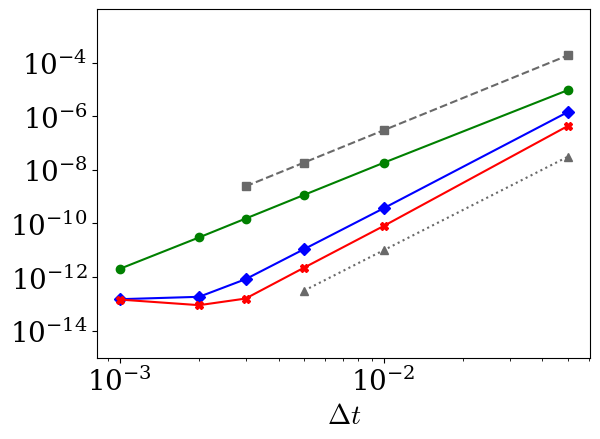

<Figure size 640x480 with 0 Axes>

In [36]:
from itertools import cycle
lines = [":","--","-.","-"]
colors = ["green", "blue", "red" ]






fig = plt.figure(2)
for idx in range(len(methods)):
    #plt.plot(dts,r_errs[idx],color = colors[idx],linestyle=lines[idx],label = method_names[idx])
    #plt.plot(dts,b_errs[idx],color = colors[idx],linestyle=lines[idx],label = method_names[idx])
    
    plt.plot(dts,qo_errs[idx],color = colors[idx],linestyle='-',marker=markers[idx],label = method_names[idx])

plt.ylim(1.e-15, 1.e-2)

plt.plot(dts[2:], 30*dts[2:]**4, linestyle="--", marker=markers[3], color="dimgray", label="$\mathcal{O}(\Delta t^4)$" )
#plt.annotate(r"$\mathcal{O}(\Delta t^4)$", (0.27e-2, 0.6e-7), color="k", fontsize=15)
plt.plot(dts[3:], 1e-1*dts[3:]**5, linestyle=":", marker= markers[4], color="dimgray", label="$\mathcal{O}(\Delta t^5)$")
#plt.annotate(r"$\mathcal{O}(\Delta t^5)$", (2.5e-2, 2.0e-10), color="k", fontsize=15)
plt.xscale("log"); plt.yscale("log"); plt.xlabel("$\Delta t$");
#plt.ylabel('Error')
fig.tight_layout()
#plt.legend(fontsize=12)

#plt.savefig("./Figures/Kepler_convergence_QO.png",bbox_inches="tight")

plt.yticks([ 1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4])

ax = plt.gca()
plt.figure()
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc="center", ncol=3)

#plt.savefig("./Figures/Kepler_convergence_legend.png",bbox_inches="tight")


plt.show()

# Convergence RRK

In [37]:


methods = [rk44, fehlberg45, dp75]

method_names = ['RK(4,4)', "Fehlbergs(6,5)", 'DP(7,5)']


T= 1*np.pi # half Cycle


dts= np.array([  0.001,0.002, 0.003, 0.005, 0.01, 0.05 ])


# Initial condition
e= 0.5
t0 = 0; q0 = np.array([1 - e, 0, 0, np.sqrt((1 + e)/(1 - e))])


r_errs = np.zeros((len(methods),len(dts)));  




for idx in range(len(methods)):
    rkm = methods[idx]
    for dt_idx in range(len(dts)):
        dt = dts[dt_idx]

        r_T, r_U,  r_Inv1 , r_Inv2 , r_Inv3 = compute_sol_multi_relaxation(method_names[idx], rkm, dt, f, T, q0, t0)
       
        
        
        
    
        r_error = np.max(np.abs(r_U[-1, 0:2]-np.array([-1-e, 0]))); 
        
        r_errs[idx][dt_idx]=r_error; 


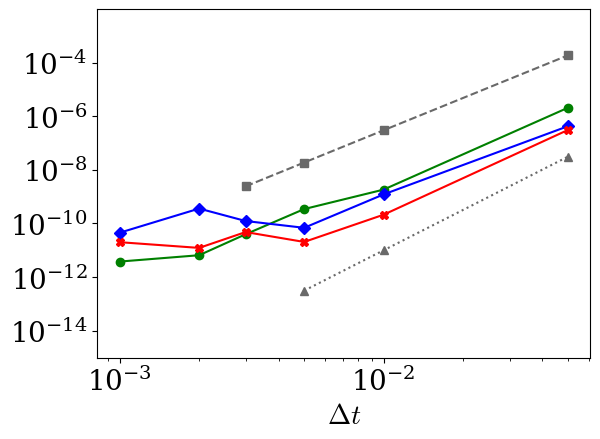

<Figure size 640x480 with 0 Axes>

In [38]:
from itertools import cycle
lines = [":","--","-.","-"]
colors = ["green", "blue", "red" ]






fig = plt.figure(2)
for idx in range(len(methods)):
  
    
    plt.plot(dts,r_errs[idx],color = colors[idx],linestyle='-',marker=markers[idx],label = method_names[idx])

plt.ylim(1.e-15, 1.e-2)


plt.plot(dts[2:], 30*dts[2:]**4, linestyle="--", marker=markers[3], color="dimgray", label="$\mathcal{O}(\Delta t^4)$" )
#plt.annotate(r"$\mathcal{O}(\Delta t^4)$", (0.27e-2, 0.6e-7), color="k", fontsize=15)
plt.plot(dts[3:], 1e-1*dts[3:]**5, linestyle=":", marker= markers[4], color="dimgray", label="$\mathcal{O}(\Delta t^5)$")
#plt.annotate(r"$\mathcal{O}(\Delta t^5)$", (2.5e-2, 2.0e-10), color="k", fontsize=15)
plt.xscale("log"); plt.yscale("log"); plt.xlabel("$\Delta t$");
#plt.ylabel('Error')
fig.tight_layout()
#plt.legend(fontsize=12)


#plt.savefig("./Figures/Kepler_convergence_RRK.png",bbox_inches="tight")

plt.yticks([ 1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4])

ax = plt.gca()
plt.figure()
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc="center", ncol=3)



plt.show()